## ECC plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Open results.txt (Place where I store experiment results of the ECC :) 

f_normal = open("./results.txt")
lines = f_normal.readlines()

#f = open("./new_results.txt")
#lines = f.readlines()

In [3]:
i = 0
lloss = 0
data={"centered":{}, "not_centered":{}}

for line in lines[1:]: 
    i+=1
    a = line.split('\t')
    if ("(" in a[1]):
        a_ = a[1].replace("(", "").replace(")", "").replace(",", "")
        loss = float(a_)
    else: 
        loss = float(a[1])
    time = a[2]
    transport = False if "!" in a[3] else True
    success = True if "Tru" in a[4] else False
    if transport:     
        if lloss == loss:
            print("not same c")
            data["centered"]["{}".format(loss)]["duration"].append(int(time))
            data["centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["centered"]["{}".format(loss)] = {"duration": [time], "success": [success]}
        lloss = loss
    else: 
        if lloss == loss:
            print("not same nc")
            data["not_centered"]["{}".format(loss)]["duration"].append(int(time))
            data["not_centered"]["{}".format(loss)]["success"].append(success)
        else: 
            data["not_centered"]["{}".format(loss)]= {"duration": [time], "success": [success]}
        lloss = loss
        
    

not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same c
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not same nc
not 

IndexError: list index out of range

In [4]:
losses = []
for items in data["centered"]: 
    losses.append(items)


In [5]:
print(data)

def analyze_vars(data, type_):
    losses = []
    for items in data["{}".format(type_)]: 
        losses.append(items)
    
    data_ = {}
    for loss in losses:
        data_["{}".format(loss)]={"avg":0, "succ_per":0}
        duration_ = data["{}".format(type_)][str(loss)]["duration"]
        success = data["{}".format(type_)][str(loss)]["success"]
        success_i = [i for i, s in enumerate(success) if s]
        duration_s = [int(duration_[i]) for i in success_i]
        if len(duration_s) > 0:
            data_["{}".format(loss)]["avg"] = float(sum(duration_s))/len(duration_s)
            data_["{}".format(loss)]["max"] = max(duration_s)
            data_["{}".format(loss)]["min"] = min(duration_s)
            data_["{}".format(loss)]["succ_per"] = len(success_i)/10
        else: 
            data_["{}".format(loss)]["avg"] = 0
            data_['{}'.format(loss)]["max"] = 0
            data_["{}".format(loss)]["min"] = 0
            data_["{}".format(loss)]["succ_per"] = 0

    
    return losses, data_

{'centered': {'0.1': {'duration': [' 16', 22, 18, 17, 36, 19, 16, 17, 46, 19], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.5': {'duration': [' 17', 16, 15, 22, 17, 19, 18, 25, 17, 16], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.75': {'duration': [' 34', 19, 23, 22, 21, 21, 17, 17, 21, 22], 'success': [True, True, True, True, True, True, True, True, True, True]}, '0.8': {'duration': [' 18', 18, 30, 17, 17, 29, 30, 19, 61, 24], 'success': [True, True, True, True, True, True, True, True, False, True]}, '0.85': {'duration': [' 22', 61, 18, 25, 18, 17, 24, 30, 18, 26], 'success': [True, False, True, True, True, True, True, True, True, True]}, '0.9': {'duration': [' 16', 32, 17, 61, 18, 39, 61, 23, 25, 22], 'success': [True, True, True, False, True, True, False, True, True, True]}, '0.95': {'duration': [' 61', 61, 61, 61, 61, 27, 61, 61, 37, 61], 'success': [False, False, False, False, False, True, False, False, True, False]}

In [6]:
try:
   losses, c_data = analyze_vars(data, "centered")
except Exception as e:
    print(str(e))
try:
    losses, nc_data = analyze_vars(data, "not_centered")
except Exception as e:
    print(str(e))

In [7]:
print(c_data)

#print(nc_data)
print("######")
print(nc_data)

{'0.1': {'avg': 22.6, 'succ_per': 1.0, 'max': 46, 'min': 16}, '0.5': {'avg': 18.2, 'succ_per': 1.0, 'max': 25, 'min': 15}, '0.75': {'avg': 21.7, 'succ_per': 1.0, 'max': 34, 'min': 17}, '0.8': {'avg': 22.444444444444443, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.85': {'avg': 22.0, 'succ_per': 0.9, 'max': 30, 'min': 17}, '0.9': {'avg': 24.0, 'succ_per': 0.8, 'max': 39, 'min': 16}, '0.95': {'avg': 32.0, 'succ_per': 0.2, 'max': 37, 'min': 27}, '0.99': {'avg': 0, 'succ_per': 0, 'max': 0, 'min': 0}}
######
{'0.1': {'avg': 37.77777777777778, 'succ_per': 0.9, 'max': 67, 'min': 23}, '0.5': {'avg': 32.7, 'succ_per': 1.0, 'max': 54, 'min': 24}, '0.75': {'avg': 31.0, 'succ_per': 0.9, 'max': 41, 'min': 23}, '0.8': {'avg': 27.88888888888889, 'succ_per': 0.9, 'max': 33, 'min': 24}, '0.85': {'avg': 29.77777777777778, 'succ_per': 0.9, 'max': 36, 'min': 25}, '0.9': {'avg': 39.333333333333336, 'succ_per': 0.3, 'max': 44, 'min': 35}, '0.95': {'avg': 39.0, 'succ_per': 0.2, 'max': 43, 'min': 35}, '0.99': {

In [8]:
c_avg = []
c_min = []
c_max = []
c_suc = []

nc_avg = []
nc_min = []
nc_max = []
nc_suc = []

for i in c_data:
    c_avg.append(c_data[i]['avg'])
    c_max.append(c_data[i]['max'])
    c_min.append(c_data[i]['min'])
    c_suc.append(c_data[i]['succ_per'])

for i in nc_data:
    nc_avg.append(nc_data[i]['avg'])
    nc_max.append(nc_data[i]['max'])
    nc_min.append(nc_data[i]['min'])
    nc_suc.append(nc_data[i]['succ_per'])


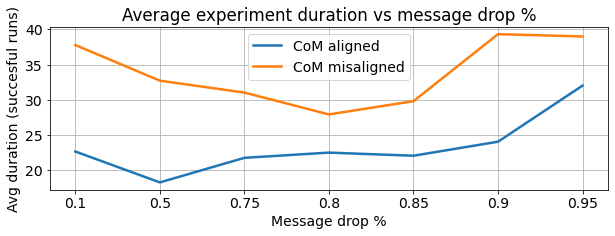

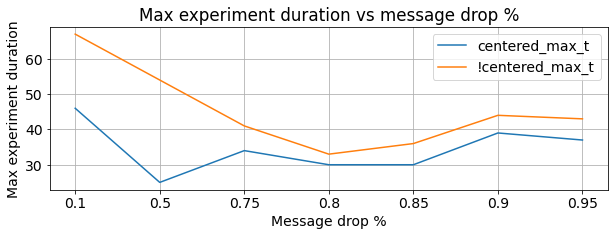

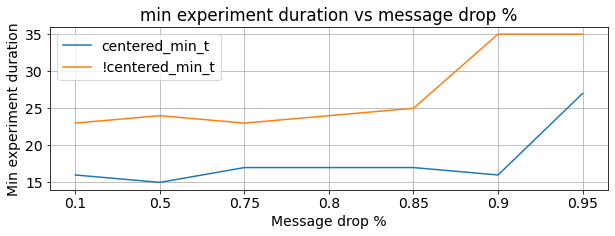

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


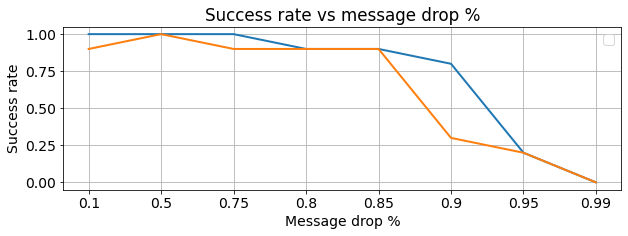

In [15]:
import matplotlib
import matplotlib.pyplot as plt



matplotlib.rcParams.update({'font.size': 14})
# https://matplotlib.org/stable/gallery/ticks/tick_labels_from_values.html
plt.figure(figsize=(10, 3))
plt.plot(losses[:-1], c_avg[:-1], label="CoM aligned", linewidth=2.5)
plt.plot(losses[:-1], nc_avg[:-1], label="CoM misaligned", linewidth=2.5)
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Avg duration (succesful runs)')
plt.title('Average experiment duration vs message drop %')
plt.savefig('message_drop_vs_avg_duration.png')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(losses[:-1], c_max[:-1], label="centered_max_t")
plt.plot(losses[:-1], nc_max[:-1], label="!centered_max_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Max experiment duration')
plt.title('Max experiment duration vs message drop %')
plt.savefig('message_drop_vs_max_duration.png')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(losses[:-1], c_min[:-1], label="centered_min_t")
plt.plot(losses[:-1], nc_min[:-1], label="!centered_min_t")
plt.grid()
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Min experiment duration')
plt.title('min experiment duration vs message drop %')
plt.savefig('message_drop_vs_min_duration.png')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(losses, c_suc, linewidth=2)
plt.plot(losses, nc_suc, linewidth=2)
plt.legend()
plt.xlabel('Message drop %')
plt.ylabel('Success rate')
plt.title('Success rate vs message drop %')
plt.grid()
plt.savefig('message_drop_vs_success_rate.png')
plt.show()

In [37]:
print(losses)

['0.8', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '0.9', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99']


In [12]:
losses = list(set([float(l) for l in losses]))
losses.sort

<function list.sort(*, key=None, reverse=False)>

In [82]:
remove_keys = ['0.8', '0.81', '0.82', '0.83', '0.84', '0.87', '0.95', '0.96', '0.97', '0.98', '0.99']  

print(nc_data)
print(c_data)
    
for i in remove_keys: 
    try:
        del nc_data[i]
    except Exception as e:
        print(str(e))
    try:
        del c_data[i]
    except Exception as e:
        print(str(e))
        


for i in c_data:
    c_avg.append(c_data[i]['avg'])
    c_max.append(c_data[i]['max'])
    c_min.append(c_data[i]['min'])
    c_suc.append(c_data[i]['succ_per'])

for i in nc_data:
    nc_avg.append(nc_data[i]['avg'])
    nc_max.append(nc_data[i]['max'])
    nc_min.append(nc_data[i]['min'])
    nc_suc.append(nc_data[i]['succ_per'])


print(nc_data)
print(c_data)

{'0.85': {'avg': 35.0, 'succ_per': 0.8, 'max': 40, 'min': 28}, '0.86': {'avg': 34.6, 'succ_per': 0.5, 'max': 45, 'min': 24}, '0.88': {'avg': 31.0, 'succ_per': 0.7, 'max': 36, 'min': 27}, '0.89': {'avg': 28.833333333333332, 'succ_per': 0.6, 'max': 38, 'min': 23}, '0.9': {'avg': 34.0, 'succ_per': 0.2, 'max': 41, 'min': 27}, '0.91': {'avg': 28.5, 'succ_per': 0.2, 'max': 33, 'min': 24}, '0.92': {'avg': 41.0, 'succ_per': 0.2, 'max': 43, 'min': 39}, '0.93': {'avg': 35.0, 'succ_per': 0.1, 'max': 35, 'min': 35}, '0.94': {'avg': 30.0, 'succ_per': 0.1, 'max': 30, 'min': 30}}
{'0.85': {'avg': 23.857142857142858, 'succ_per': 0.7, 'max': 34, 'min': 19}, '0.86': {'avg': 21.444444444444443, 'succ_per': 0.9, 'max': 30, 'min': 15}, '0.88': {'avg': 22.333333333333332, 'succ_per': 0.9, 'max': 32, 'min': 15}, '0.89': {'avg': 28.0, 'succ_per': 0.9, 'max': 61, 'min': 15}, '0.9': {'avg': 36.22222222222222, 'succ_per': 0.9, 'max': 56, 'min': 23}, '0.91': {'avg': 25.25, 'succ_per': 0.8, 'max': 43, 'min': 16}, 

In [205]:
losses


[0.1, 0.5, 0.85, 0.8, 0.75, 0.9, 0.95, 0.99]

In [206]:
nc_suc

[0.9, 1.0, 0.9, 0.9, 0.9, 0.3, 0.2, 0]